In [198]:
# Packages
import os, sys
import scanpy as sc
import anndata
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
%matplotlib inline

In [199]:
# Dir
dir = os.getcwd()
pbmc = 'pbmc_10k_v3_filtered_feature_bc_matrix.h5'

# Read files
file=Path(dir,pbmc)
adata=sc.read_10x_h5(file)
print("-------------------The original data--------------------------")
print(adata)

# Cells
print("-------------------The first 10 cells--------------------------")
print(adata.obs_names[1:10,])

# Annotation
print("-------------------The first 10 genes--------------------------")
print(adata.var['gene_ids'][1:10,])

# data
print("-------------------The first 10 data--------------------------")
print(adata.X[:10])


-------------------The original data--------------------------
AnnData object with n_obs × n_vars = 11769 × 33538
    var: 'gene_ids', 'feature_types', 'genome'
-------------------The first 10 cells--------------------------
Index(['AAACCCAAGGTTCCGC-1', 'AAACCCACAGAGTTGG-1', 'AAACCCACAGGTATGG-1',
       'AAACCCACATAGTCAC-1', 'AAACCCACATCCAATG-1', 'AAACCCAGTGGCTACC-1',
       'AAACCCATCCCGAGAC-1', 'AAACCCATCTGGCCGA-1', 'AAACCCATCTGTTCAT-1'],
      dtype='object')
-------------------The first 10 genes--------------------------
FAM138A       ENSG00000237613
OR4F5         ENSG00000186092
AL627309.1    ENSG00000238009
AL627309.3    ENSG00000239945
AL627309.2    ENSG00000239906
AL627309.4    ENSG00000241599
AL732372.1    ENSG00000236601
OR4F29        ENSG00000284733
AC114498.1    ENSG00000235146
Name: gene_ids, dtype: object
-------------------The first 10 data--------------------------
  (0, 33508)	1.0
  (0, 33505)	4.0
  (0, 33503)	2.0
  (0, 33502)	10.0
  (0, 33501)	5.0
  (0, 33499)	20.0
  

/Users/hsieh/opt/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [200]:
# Filter
# The sample data is already filtered. The parameters are as follows:
# min nCount of RNA 501
# max nCount of RNA 79534
# min nFeature of RNA (gene) 54 
# max nFeature of RNA (gene) 7211
# min percent of mt 0
# max percent of mt 97

# sc.pp.filter_cells(adata_subset, min_genes=200)
# sc.pp.filter_genes(adata_subset, min_cells=3)
# print(adata_subset)


In [201]:
# Create another object for more manipulations
adata_new = adata

# normalize the expression, the unit is CPM (counts per million)
# but for DESeq, don't normalize the data
sc.pp.normalize_total(adata_new, target_sum=1e6)

# log transform the raw data if needed
# and set the 'raw' attribute to the natural logarithmized data
sc.pp.log1p(adata_new)

# Freeze the data in log transformed value
adata_new.raw = adata_new

# Add another layers to store the data
adata_new.layers["logNormalized_data"] = adata_new.X


In [202]:
# Reduce the matrix by selecting most variant genes
sc.pp.highly_variable_genes(adata_new,n_top_genes=200)

adata_subset = adata_new[:, adata_new.var["highly_variable"]]
print(adata_subset)

# transform the count matrix (matrix with most variant genes) to data frame
adata_subset.layers["logNormalized_data"] = adata_subset.X
df_adata = adata_subset.to_df(layer="logNormalized_data")

# Take a look at the matrix data
df_adata.head(10)

View of AnnData object with n_obs × n_vars = 11769 × 200
    var: 'gene_ids', 'feature_types', 'genome', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'
    layers: 'logNormalized_data'


,AL031283.2,C1QB,LINC00853,PDZK1IP1,TAL1,RNF11,C1orf87,NEXN,AQP10,LMNA,...,IGLC2,IGLC3,IGLC6,IGLC7,GNAZ,GAS2L1,GRAP2,PARVB,MAP3K7CL,S100B
AAACCCAAGCGCCCAT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000
AAACCCAAGGTTCCGC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,4.610675,0.0,0.000000
AAACCCACAGAGTTGG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000
AAACCCACAGGTATGG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000
AAACCCACATAGTCAC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.535632,8.368613,0.0,0.0,0.0,0.0,0.000000,5.282432,0.0,0.000000
AAACCCACATCCAATG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,5.392366,0.000000,0.0,0.000000
AAACCCAGTGGCTACC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,5.012029,5.012029,0.0,0.000000
AAACCCATCCCGAGAC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000
AAACCCATCTGGCCGA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,5.232283,5.232283,0.0,0.000000
AAACCCATCTGTTCAT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,5.278543,0.000000,0.0,5.278543


In [203]:
# Read the predicted results by Azimuth
azimuth="azimuth_pred.tsv"
predictedFile=Path(dir,azimuth)
df_predict=pd.read_csv(predictedFile,sep="\t")
df_predict.set_index("cell",inplace=True)
# df_predict=df_predict["predicted.celltype.l2"]
# df_predict.head(10)

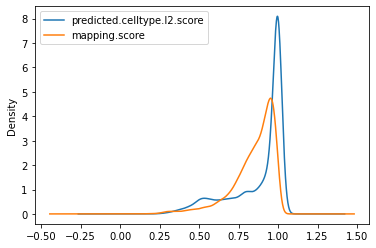

In [205]:
# filter cells

# Check the distribution
ax = df_predict.plot.kde()

In [206]:
# Confirm the cell numbers are equal
print(len(df_adata.index)==len(df_predict.index))

df_join = df_adata.join(df_predict)
df_join.index.name="cell"
df_join.head(10)

True


,AL031283.2,C1QB,LINC00853,PDZK1IP1,TAL1,RNF11,C1orf87,NEXN,AQP10,LMNA,...,IGLC7,GNAZ,GAS2L1,GRAP2,PARVB,MAP3K7CL,S100B,predicted.celltype.l2,predicted.celltype.l2.score,mapping.score
cell,,,,,,,,,,,,,,,,,,,,,
AAACCCAAGCGCCCAT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,CD4 TCM,0.654292,0.695340
AAACCCAAGGTTCCGC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,4.610675,0.0,0.000000,cDC2,1.000000,0.988773
AAACCCACAGAGTTGG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,CD14 Mono,1.000000,0.867265
AAACCCACAGGTATGG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,NK,1.000000,0.955233
AAACCCACATAGTCAC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,5.282432,0.0,0.000000,B naive,1.000000,0.954018
AAACCCACATCCAATG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.392366,0.000000,0.0,0.000000,NK,1.000000,0.906141
AAACCCAGTGGCTACC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.012029,5.012029,0.0,0.000000,CD4 TCM,0.747602,0.788406
AAACCCATCCCGAGAC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,CD4 TCM,0.994921,0.780086
AAACCCATCTGGCCGA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.232283,5.232283,0.0,0.000000,CD8 TCM,0.494408,0.948024


In [208]:
# Save a fraction of the file
output="single_cell_sample_data"+".csv"
df_write = df_join.sample(frac=0.2)
df_write.to_csv(output,sep=",")
print(f'Write {len(df_write.index)} cells into the file')

Write 2354 cells into the file


In [134]:
df_write.head(10)

,MIR1302-2HG,FAM138A,OR4F5,AL627309.1,AL627309.3,AL627309.2,AL627309.4,AL732372.1,OR4F29,AC114498.1,...,BX072566.1,AL354822.1,AC023491.2,AC004556.1,AC233755.2,AC233755.1,AC240274.1,AC213203.1,FAM231C,predicted.celltype.l2
cell,,,,,,,,,,,,,,,,,,,,,
GGACGTCGTTGCAAGG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CD14 Mono
CGACAGCAGGTAAGAG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,cDC2
ATGGGAGCAGTCAGAG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CD8 Naive
AGCGCCATCAACTTTC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CD4 TCM
CATCCCAGTATCGAGG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CD14 Mono
GGGCGTTTCGGCTATA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CD14 Mono
ACACCAACAATCGTCA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CD14 Mono
GCAGTTACATCTCGTC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Eryth
ACCTGTCCACTTGTCC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CD14 Mono
